# Sheet 0 - Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(seed=1)

---

## Task 1: Distributions

### 1.1

Generate `10_000` samples from:

- Normal distribution (`mean`=`50`, `std`=`10`)
- Uniform distribution (`20`–`80`)
- Exponential distribution (`scale`=`10`)
- Poisson distribution (`loc`=`10`)

Plot the histograms and compute mean and standard deviation.

---

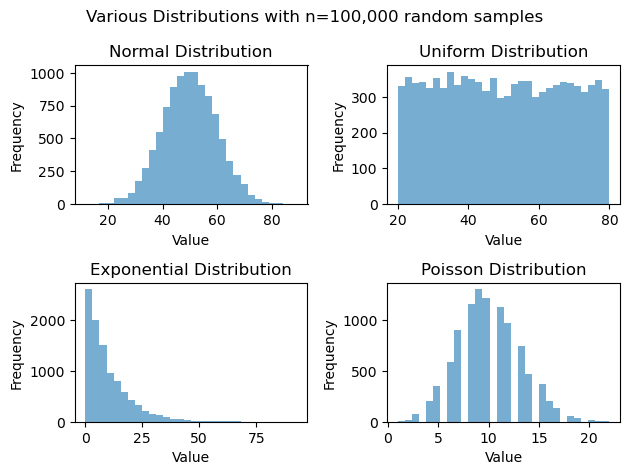

In [2]:
n = 10_000
normal_dist = rng.normal(size=n, loc=50, scale=10)
uniform_dist = rng.uniform(size=n, low=20, high=80)
expo_dist = rng.exponential(scale=10, size=n)
poisson_dist = rng.poisson(lam=10, size=n)
data_labels = ['Normal', 'Uniform', 'Exponential', 'Poisson']

fig, axes = plt.subplots(2, 2)

ax = axes.flatten()
for i, data in enumerate([normal_dist, uniform_dist, expo_dist, poisson_dist]):
    ax[i].hist(data, bins=30, alpha=0.6)
    ax[i].set_title(f'{data_labels[i]} Distribution')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')

plt.suptitle('Various Distributions with n=100,000 random samples', fontsize=12)
plt.tight_layout()
plt.show()


---

### 1.2

- Take 100 random samples from each distribution.

- Compute and compare sample means and standard deviations to the full dataset.
---

In [3]:
sample_size = 100
samples_normal = rng.choice(normal_dist, size=sample_size, replace=False)
samples_uniform = rng.choice(uniform_dist, size=sample_size, replace=False)
samples_expo = rng.choice(expo_dist, size=sample_size, replace=False)
samples_poisson = rng.choice(poisson_dist, size=sample_size, replace=False)

print("Sample Means and Standard Deviations of the random samples:")
print(f"Normal: Mean = {samples_normal.mean():.2f}, Std = {samples_normal.std():.2f}")
print(f"Uniform: Mean = {samples_uniform.mean():.2f}, Std = {samples_uniform.std():.2f}")
print(f"Exponential: Mean = {samples_expo.mean():.2f}, Std = {samples_expo.std():.2f}")
print(f"Poisson: Mean = {samples_poisson.mean():.2f}, Std = {samples_poisson.std():.2f}")

print("\n")
print("Sample Means and Standard Deviations of the full dataset:")
print(f"Normal: Mean = {normal_dist.mean():.2f}, Std = {normal_dist.std():.2f}")
print(f"Uniform: Mean = {uniform_dist.mean():.2f}, Std = {uniform_dist.std():.2f}")
print(f"Exponential: Mean = {expo_dist.mean():.2f}, Std = {expo_dist.std():.2f}")
print(f"Poisson: Mean = {poisson_dist.mean():.2f}, Std = {poisson_dist.std():.2f}")

Sample Means and Standard Deviations of the random samples:
Normal: Mean = 48.58, Std = 10.19
Uniform: Mean = 49.21, Std = 17.35
Exponential: Mean = 11.95, Std = 11.15
Poisson: Mean = 10.35, Std = 3.13


Sample Means and Standard Deviations of the full dataset:
Normal: Mean = 49.89, Std = 9.98
Uniform: Mean = 49.72, Std = 17.36
Exponential: Mean = 10.01, Std = 9.85
Poisson: Mean = 10.00, Std = 3.13


---

### 1.3

Draw `1000` samples of size `50` from the exponential distribution.

Compute each sample’s mean.

Plot the histogram of the sample means.

---

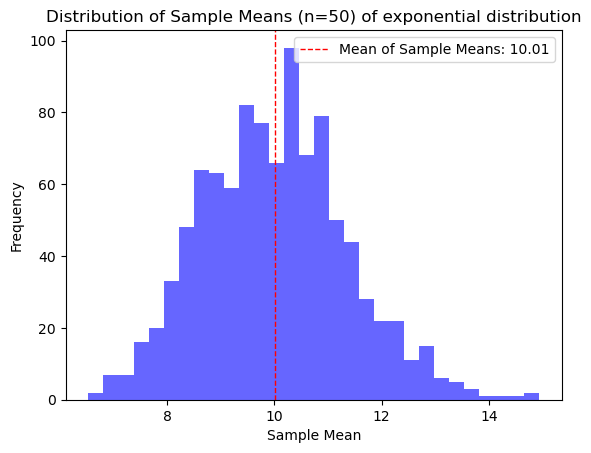

In [4]:
means = np.ones(1000)
for i in range(1000):
    sample = rng.choice(expo_dist, size=50, replace=False)
    means[i] = sample.mean()


plt.hist(means, bins=30, alpha=0.6, color='blue')
plt.axvline(np.mean(means), color='red', linestyle='dashed', linewidth=1, label='Mean of Sample Means: {:.2f}'.format(np.mean(means)))
plt.title('Distribution of Sample Means (n=50) of exponential distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

---

### 1.4

Generate `10_000` samples from a bivariate normal with mean $[0,0]$ and covariance matrix:
$$
\begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}
$$

Plot the joint distribution as a scatter plot.

Compute the covariance matrix.

---

Covariance matrix:
[[1.0062616  0.79987246]
 [0.79987246 0.99181994]]


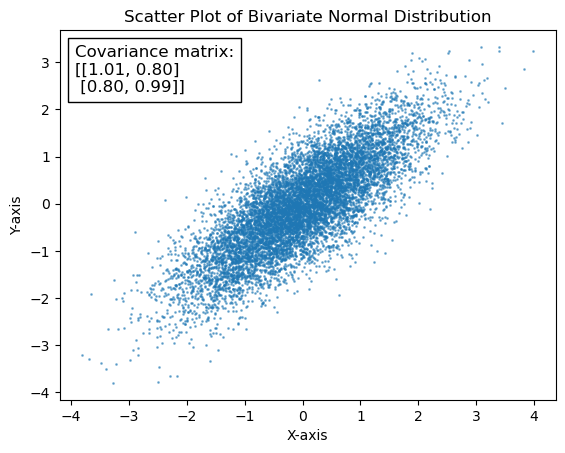

In [ ]:
from matplotlib.offsetbox import AnchoredText

cov = ([1, .8], [.8, 1])
x, y = rng.multivariate_normal(mean=[0, 0], cov=cov, size=10_000).T

covariance = np.cov(x, y)
print(f"Covariance matrix:\n{covariance}")

cov_text = (
    f"Covariance matrix:\n"
    f"[[{covariance[0,0]:.2f}, {covariance[0,1]:.2f}]\n"
    f" [{covariance[1,0]:.2f}, {covariance[1,1]:.2f}]]"
)

plt.scatter(x, y, alpha=0.5, s=1)
plt.title('Scatter Plot of Bivariate Normal Distribution')
plt.xlabel('X-axis')
at = AnchoredText(cov_text, loc='upper left', prop=dict(size=12), frameon=True)
plt.gca().add_artist(at)
plt.ylabel('Y-axis')
# plt.grid()
plt.show()

# Wenn man lineare Transformationen anwendet, ändert sich die Kovarianzmatrix nicht, da unabhängig. Man kann also 2*x & y plotten und es bleibt gleich

---
## 1.5

Generate normal data (`loc`=`5`, `scale`=`2`, size=`10_000`).

Apply the transformation $y =3x−4$.

Plot the distributions and compute and compare their `means` and `stds`.  

Compare the mean of the transformed distribution with the transformed mean of the original distribution.

---

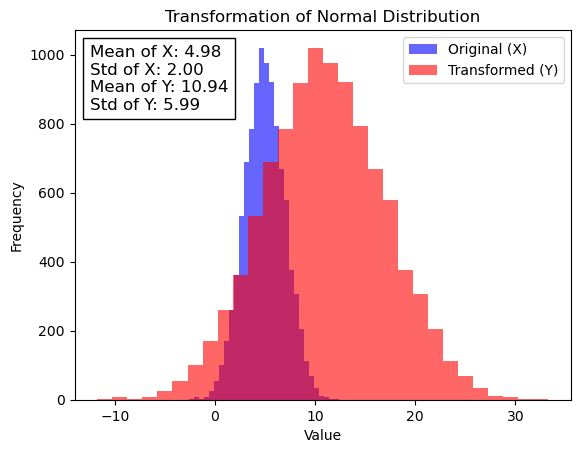

In [15]:
def trafo(x):
    return 3*x -4


normal_dist = rng.normal(size=n, loc=5, scale=2)
text = (
        "Mean of X: {:.2f}\n"
        "Std of X: {:.2f}\n"
        "Mean of Y: {:.2f}\n"
        "Std of Y: {:.2f}").format(
    normal_dist.mean(),
    normal_dist.std(),
    trafo(normal_dist).mean(),
    trafo(normal_dist).std()
)
at = AnchoredText(text, loc='upper left', prop=dict(size=12), frameon=True)

plt.hist(normal_dist, bins=30, alpha=0.6, color='blue')
plt.hist(trafo(normal_dist), bins=30, alpha=0.6, color='red')
plt.title('Transformation of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Original (X)', 'Transformed (Y)'])
plt.gca().add_artist(at)
plt.show()

In [16]:
value = np.mean(normal_dist)
trafo_mean = trafo(value)
print(f"Mean of X: {value:.2f}, Mean of Y: {trafo_mean:.2f}")

Mean of X: 4.98, Mean of Y: 10.94


---
## 1.6

Generate normal data (`loc`=`5`, `scale`=`2`, size=`10_000`).

Apply the transformation $y =3x^2−4$.

Plot the distributions and compute and compare their `means` and `stds`.

Compare the mean of the transformed distribution with the transformed mean of the original distribution.

---

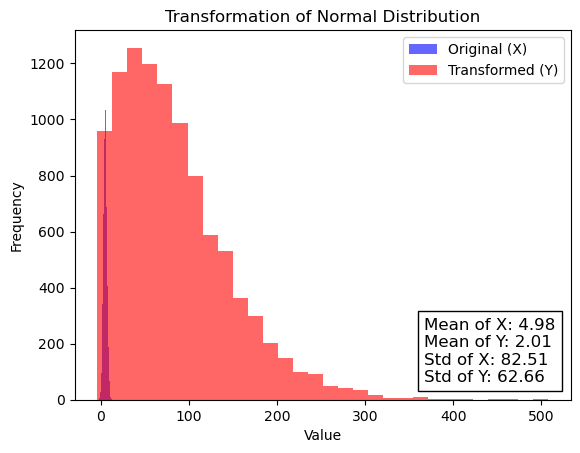

In [17]:
def trafo(x):
    return 3*x**2 -4


normal_dist = rng.normal(size=n, loc=5, scale=2)
text = (
        "Mean of X: {:.2f}\n"
        "Mean of Y: {:.2f}\n"
        "Std of X: {:.2f}\n"
        "Std of Y: {:.2f}").format(
    normal_dist.mean(),
    normal_dist.std(),
    trafo(normal_dist).mean(),
    trafo(normal_dist).std()
)
at = AnchoredText(text, loc='lower right', prop=dict(size=12), frameon=True)

plt.hist(normal_dist, bins=30, alpha=0.6, color='blue')
plt.hist(trafo(normal_dist), bins=30, alpha=0.6, color='red')
plt.title('Transformation of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Original (X)', 'Transformed (Y)'])
plt.gca().add_artist(at)
plt.show()

In [18]:
value = np.mean(normal_dist)
trafo_mean = trafo(value)
print(f"Mean of X: {value:.2f}, Mean of Y: {trafo_mean:.2f}")

Mean of X: 4.98, Mean of Y: 70.42
